In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# K Nearest Neighbor (KNN) Classifier

This model learns through similarity. Looks for datapoints that are most similar to the value/observation we are tryng to predict. The first example is nearest neighbor. We want to see if a song is either 'jazz' or 'rock'. Our measurements are duraation in seconds of the song and the 'loudness' of the song measured in loudness units (can't use decibels since it isn't a linear measure)

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

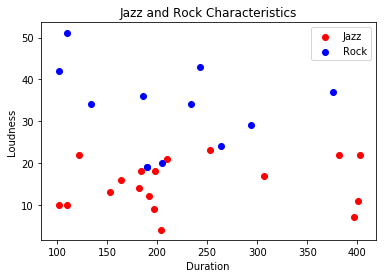

In [3]:
plt.scatter(
    music[music['jazz']==1].duration, 
    music[music['jazz']==1].loudness, color='red')

plt.scatter(
            music[music['jazz']==0].duration,
            music[music['jazz']==0].loudness, color='blue')
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

By looking at the graph, we can see how the nearest neighbor model works. Whatever point we are trying to predict, it plots on that graph and see's which other data point is closest to it and uses it to make the prediction. We measure distance in 'Euclidean distance' which can be calculated using the pythagorean theorem. This works on an n-dimensional scale such that the distance can be measured using this format: sqrt( (x1-y1)^2 + (x2-y2)^2 + (x3-y3)^2 + ... + (xn-yn)^2) for an n-dimensional matrix of values

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

#The result is 0, which is not jazz from our definition of the jazz variable

array([0], dtype=int64)

K-Nearest Neighbor is an extension of nearest neighbor, except instead of one point being used as the similarity comparison, it uses the k - nearest observations as comparisons. Let's try to remodel, except this time we'll use 5 neighbors for the comparison.

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music['jazz']
neighbors.fit(X, Y)

print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[0.4 0.6]]


(14496,)
(302, 48)


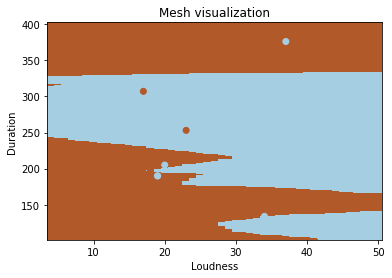

In [7]:
X = np.array(X)
Y = np.array(Y)

#mesh size
h = 1

# Plot the decision boundary. We assign a color to each point in the mesh.
#This creates the min and max for loudness and duration
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
#np.c_ pairs up values columnswise, so if you have 2 columns containing data, then it combines them to make one observation
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [8]:
np.c_?

In [13]:
ar1 = [10,12,14,19,15,20,35,18]
ar2 = [2,6,7,8,9,10,12,15]
result = [0,0,1,0,1,1,0,1]
def nearest_neighbor(outcome, var1, var2, pred1, pred2):
    dist = []
    for i in range(len(data1)):
        dist.append((np.sqrt((pred1-var1[i])**2 + (pred2-var2[i])**2), outcome[i]))
    return min(dist)[1]
print(nearest_neighbor(result, ar1, ar2, 2, 6))

0


In [14]:
print(nearest_neighbor(music['jazz'], music['loudness'], music['duration'], 24, 190))

0
